# Twitter US Airline Sentiment


## **Context:**

- This dataset consists of reviews of fine foods from amazon.
- The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include a plain text review.
- It also includes reviews from all other Amazon categories.

#### The purpose of this analysis is to make up a prediction model where we will be able to predict whether a recommendation is positive or negative. In this analysis, we will focus the positive/negative sentiment of the recommendation.



In [171]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('movie_reviews')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.

[nltk_data] Downloading package stopwords to C:\Users\Shubhankar
[nltk_data]     Banerjee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Shubhankar
[nltk_data]     Banerjee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Shubhankar
[nltk_data]     Banerjee\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package movie_reviews to C:\Users\Shubhankar
[nltk_data]     Banerjee\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [172]:
# Loading data into pandas dataframe
data = pd.read_csv("Tweets.csv")

In [173]:
data.shape                                                 # print shape of data.

(14640, 15)

In [174]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [175]:
# Taking only 14640 entries for demonstration purpose. As full data will take more time to process.
# Only keeping score and Text columns from the data, as these are useful for our analysis.

data = data.loc[:14639, ['text', 'airline_sentiment']]

In [176]:
data.isnull().sum(axis=0)                                # Check for NULL values.

text                 0
airline_sentiment    0
dtype: int64

In [177]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [178]:
data.shape                                # Shape of data

(14640, 2)

In [179]:
#replaceStruct = {
 #               "airline_sentiment":     {"negative": 1, "neutral": 2 ,"positive": 3}  
    
  #            }

#data = data.replace(replaceStruct)

In [180]:
data.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

### Data Pre-processing:

- Remove html tags.
- Replace contractions in string. (e.g. replace I'm --> I am) and so on.\
- Remove numbers.
- Tokenization
- To remove Stopwords.
- Lemmatized data

We have used NLTK library to tokenize words , remove stopwords and lemmatize the remaining words.

### a.Html tag removal


In [181]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials to the experience... tacky.,positive
2,@VirginAmerica I didn't today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it's a really big bad thing about it,negative


In [182]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### b. Remove the numbers

In [183]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you have added commercials to the experience... tacky.,positive
2,@VirginAmerica I did not today... Must mean I need to take another trip!,neutral
3,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse",negative
4,@VirginAmerica and it is a really big bad thing about it,negative


### c.Tokenization

In [184]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [185]:
data.head()                                                                    # Look at how tokenized data looks.

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]",positive
2,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]",neutral
3,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]",negative
4,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]",negative


In [186]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist))                              

In [189]:
lemmatizer = WordNetLemmatizer()

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)
data.head()

,text,airline_sentiment
0,v r g n e r c h e p b u r n,neutral
1,v r g n e r c p l u c e r c l e x p e r e n c e c k,positive
2,v r g n e r c n u e n n e e k e n h e r r p,neutral
3,v r g n e r c r e l l g g r e v e b l b n x u e n e r n e n g u e f c e l l e r e c u r e,negative
4,v r g n e r c r e l l b g b h n g,negative


In [188]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [108]:
data_features.shape

(14640, 1000)

In [112]:
y_train.unique()

array([2, 1, 3], dtype=int64)

In [109]:
vectorizer.get_feature_names()[:200]

['aa',
 'able',
 'absolute',
 'absolutely',
 'accept',
 'acceptable',
 'access',
 'accommodate',
 'account',
 'act',
 'actual',
 'actually',
 'add',
 'address',
 'advise',
 'advisory',
 'afternoon',
 'agent',
 'agents',
 'ago',
 'ahead',
 'air',
 'aircraft',
 'airline',
 'airlines',
 'airplane',
 'airport',
 'airports',
 'airways',
 'alert',
 'allow',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'always',
 'amaze',
 'america',
 'american',
 'americanair',
 'americanairlines',
 'amount',
 'angry',
 'announce',
 'annoy',
 'another',
 'answer',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'apologies',
 'apologize',
 'apology',
 'app',
 'apparently',
 'appear',
 'appease',
 'apply',
 'appreciate',
 'area',
 'around',
 'arrival',
 'arrive',
 'ask',
 'assign',
 'assist',
 'assistance',
 'atl',
 'atlanta',
 'attempt',
 'attendant',
 'attendants',
 'attitude',
 'austin',
 'auto',
 'automate',
 'available',
 'avgeek',
 'avoid',
 'award',
 'away',
 'awesome',
 'awful',
 '

In [119]:
labels = data['airline_sentiment']
#labels = labels.astype('int')

In [113]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [114]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7148224043715847


In [115]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

In [116]:
result

array([3, 1, 1, ..., 1, 1, 1], dtype=int64)

[[2510  220   84]
 [ 364  441   79]
 [ 172  127  395]]


<AxesSubplot:>

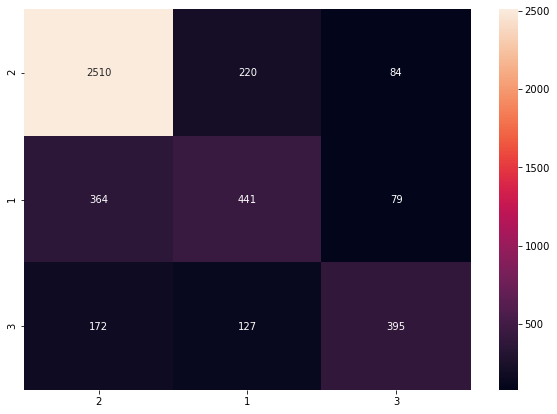

In [117]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in y_train.unique()],
                  columns = [i for i in y_train.unique()])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [122]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 1000)

In [123]:
data_features[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [44]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=10, n_jobs=4)
0.7152322404371584


In [43]:
result = forest.predict(X_test)

<AxesSubplot:>

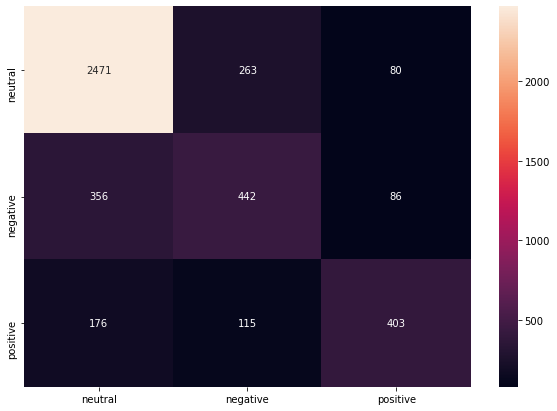

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat, index = [i for i in y_train.unique()],
                  columns = [i for i in y_train.unique()])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# Summary

### Preprocessing

* In the given dataset there were 14640 reviews from Twitter Dataset of US Airlines. From Text Processing and Sentiment analysis stand point only two columns were Relevant, namely - Text and Airline Sentiment. Here Text was the Document corpus for us while Y Airline Sentiment was the Target feature. 

* At the first look of the Data we can notice special characters like '@' and '#' , which are part of any Twitter comment. So these need to be cleaned with using Regular expression on the document corpus. 

* Since the Count and TF-IDF vectorizers are case sensitive, we had apply Techinques to convert all the tokens/words into lower case. Also we had to Lemitize the word, so that we convert all the words to their root or stem form. This will enable us to consider all words with the same root as one and count all of those together rather than considering those as seperate words.

* On top of that, all the numbers and Stop Words had to be Removed from the Text, because those do not add any information from the perspective of Sentiment Analysis.


### Vectorization Techniques

* Finally when the text is ready for us after preprocessing, we apply two different Vectorization Techniques in order to identify our top 1000 words. Now in Count Vectorization we simply look for the words with highest frequency. However in TD-IDF Vectorization we are picking the words based on their Weightages calculated using the TF_IDF formula.  Hence the feature values in Count vectorizer are all integers, while values in TF-IDF are all Floats.

### Model Performance


*   Finally we used RandomClassifier Technique to build one model each for both the Vectorization Techniques. However the accuracy score for both models is similar around 71% .
* An interseting observation after looking at the cofusion matrix is that the DataSet is unbalanced for the airline_sentiment classes. There are way more neutral comments than the positive and negative ones.
* The model predictive the positive outcomes relatively better as the number of false positives and false negatives are less.
* The models prediction for negative outcomes is only 50% accurate as the total number of false positives and false negatives equals the number of accurate predictions.
   